In [15]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections

from pandas.tools.plotting import scatter_matrix
import nltk
import face_recognition
from PIL import Image
import requests

In [16]:
# create loader object
L = instaloader.Instaloader()

#Set PANDAS to show all columns in DataFrame
# pd.set_option('display.max_columns', None)
# plt.rcParams['figure.figsize'] = (15, 5)

UTC_FILE_NAME = "_UTC"
COMMENTS_FILE_NAME = "_comments"
FILE_ADDRESS_NAME = "InstagramLog/"


#politicians
DONALD_TRUMP = 'realdonaldtrump'
BARACK_OBAMA = 'barackobama'
EMMANUEL_MACRON = 'emmanuelmacron'
THERESA_MAY = 'theresamay'
FLOTUS = 'flotus'

#news agencies
CNN = 'cnn'
FOXNEWS = 'foxnews'
BBC = 'bbcnews'
REUTERS = 'reuters'
GOAL_COM = 'goalglobal' #sport

# sport stars
LEOMESSI = 'leomessi'
CRISTIANO_RONALDO = 'cristiano'
RAFAEL_NADAL = 'rafaelnadal'
ROGER_FEDERER = 'rogerfederer'
NOVAK_DJOKOVIC = 'djokernole'

# sport clubs
REAL_MADRID = 'realmadrid'
FC_BARCELONA = 'fcbarcelona'


# MongoDB Database
instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
instagram_db = instagramClient["Instagram"]
instagram_col_post = instagram_db["Post"]
instagram_col_comment = instagram_db["Comment"]
instagram_col_like = instagram_db["Like"]
instagram_col_analyse = instagram_db["Analyse"]
instagram_col_mentioned_in_comment = instagram_db["MentionedInComment"]

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/koosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
def loadFromFile():
    df_dataset = pd.read_excel('dataset_impersonator.xlsx')
    print(df_dataset.shape[0])
    return df_dataset

In [20]:
df_dataset = loadFromFile()

3403


In [21]:
def export():
    from pandas import ExcelWriter
    writer = ExcelWriter('dataset_impersonator_with_like.xlsx')
    df_dataset.to_excel(writer,'Sheet1')
    writer.save()

In [22]:
def calculate_comment(_row):
    
    comments = list(instagram_col_comment.find( {'owener_id': _row['owener_id']} , 
                                               
                                               {'post_shortcode': 1, 
                                                'shortcode_username': 1,
                                                'id' : 1,
                                                'created_at' : 1,
                                                'text' : 1
                                               } 
                                              ))  
    
#     print(len(comments))
    data_comment =  pd.DataFrame(comments)
    
    _row['comment_total'] = len(comments)
    
    if (not data_comment.shape[0] == 0):
        
        temp = data_comment["post_shortcode"].tolist()
        myString = ",,,".join(temp)
        _row['comment_post_shortcode'] = myString
        
        temp = data_comment["shortcode_username"].tolist()
        myString = ",,,".join(temp)
        _row['comment_shortcode_username'] = myString
        
        temp = data_comment["id"].tolist()
        myString = ",,,".join(map(str, temp))
        _row['comment_id'] = myString
        
        temp = data_comment["created_at"].tolist()
        myString = ",,,".join(temp)
        _row['comment_created_at'] = myString
        
        temp = data_comment["text"].tolist()
        myString = ",,,".join(temp)
        _row['comment_text'] = myString
        
    return _row


In [23]:
def calculate_like(_row):
    likes = list(instagram_col_like.find( {'owener_id': _row['owener_id']} ,
                                         
                                {'post_shortcode': 1, 
                                'shortcode_username': 1,
                                } 
    ))

    print(len(likes))
    data_like =  pd.DataFrame(likes)

    _row['like_total'] = len(likes)
    if (not data_like.shape[0] == 0):
        
        temp = data_like["post_shortcode"].tolist()
        myString = ",,,".join(temp)
        _row['like_post_shortcode'] = myString
        
        temp = data_like["shortcode_username"].tolist()
        myString = ",,,".join(temp)
        _row['like_shortcode_username'] = myString
        
    return _row

In [11]:
df_dataset = df_dataset.apply(calculate_comment, axis=1)

In [14]:
export()

In [24]:
df_dataset = df_dataset.apply(calculate_like, axis=1)

1
1
1


KeyboardInterrupt: 

In [ ]:
export()

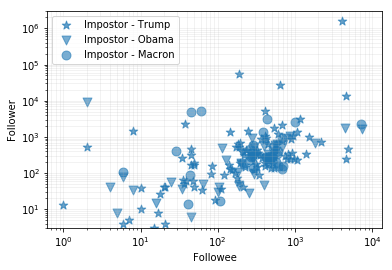

In [31]:
def plot_1():
    fig, (ax1) = plt.subplots(1,1, figsize=(6,4))


    df_trump_impersonator = merged_Frame[merged_Frame['combined_shortcode_username'] == DONALD_TRUMP]

    ax = df_trump_impersonator.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, alpha=0.7, logy=True, logx=True, grid=True, s=80, marker="*", legend=True, label='Impostor - Trump')
    # ax.grid(True, which='both', linestyle='-', alpha=0.2)
    # ax.set_ylabel("Follower")
    # ax.set_xlabel("Followee")
    # ax.set_title("a) Users who are engaded in both Liking and Commenting actions")


    df_barack_impersonator = merged_Frame[merged_Frame['combined_shortcode_username'] == BARACK_OBAMA]
    ax = df_barack_impersonator.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, alpha=0.6, logy=True, logx=True, grid=True, s=80,  marker="v", legend=True, label='Impostor - Obama')


    df_marcon_impersonator = merged_Frame[merged_Frame['combined_shortcode_username'] == EMMANUEL_MACRON]
    ax = df_marcon_impersonator.plot.scatter(x='combined_followee', y='combined_follower', ax=ax1, alpha=0.6, logy=True, logx=True, grid=True, s=80, legend=True,  marker="o", label='Impostor - Macron')
    ax.grid(True, which='both', linestyle='-', alpha=0.2)
    ax.set_ylabel("Follower")
    ax.set_xlabel("Followee")
    # 'o', 'v', 's', 'd'

    plt.savefig("plot_Similarity_1_P1.pdf")
    
plot_1()

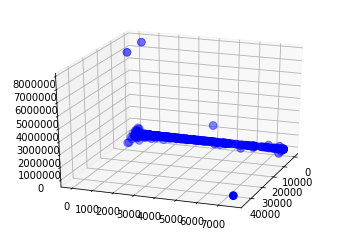

In [32]:
# libraries
from mpl_toolkits.mplot3d import Axes3D

# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(merged_Frame['combined_mediacount'], merged_Frame['combined_followee'], merged_Frame['combined_follower'], c='blue', s=60)
ax.view_init(25, 20)
plt.show()